# **Space X  Falcon 9 First Stage Landing Prediction**


## Step 8: Machine Learning Prediction

## Objectives

To experiment with different machine learning programs, including SVM, Classification Trees and Logistic Regression. 
Find best hyperparameter for each procedure through tuning, and compute the accuracy score for the test data and confusion matricies.

### Import Libraries and Define Auxiliary Functions

In [2]:
# Import relevent libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score


In [ ]:
#Create function for plotting confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])


## Load the dataframe and standardize

In [ ]:
#Load Data
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data.tail(20)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
70,71,2019-12-17,Falcon 9,6800.000000,GTO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,3,B1056,-80.577366,28.561857,1
71,72,2020-01-07,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1049,-80.577366,28.561857,1
72,73,2020-01-19,Falcon 9,6104.959412,SO,KSC LC 39A,None None,4,False,True,False,NaN,5.0,3,B1046,-80.603956,28.608058,0
73,74,2020-01-29,Falcon 9,15600.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.577366,28.561857,1
74,75,2020-02-17,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,False ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,3,B1056,-80.577366,28.561857,0
75,76,2020-03-07,Falcon 9,1977.000000,ISS,CCAFS SLC 40,True RTLS,2,True,True,True,5e9e3032383ecb267a34e7c7,5.0,3,B1059,-80.577366,28.561857,1
76,77,2020-03-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,False ASDS,5,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,4,B1048,-80.603956,28.608058,0
77,78,2020-04-22,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
78,79,2020-05-30,Falcon 9,9525.000000,ISS,KSC LC 39A,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
79,80,2020-06-04,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,5,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,5,B1049,-80.577366,28.561857,1


In [ ]:
#Load data
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
X.head(100)
X.columns
X1 = X.drop(['Orbit_ES-L1','LaunchSite_CCAFS SLC 40','LandingPad_5e9e3032383ecb267a34e7c7','Serial_B0003', \
         'GridFins_False','Reused_False','Legs_False'], axis=1)



## 1. Create target label


In [ ]:
y = data['Class'].to_numpy()

## 2. Standardize the data in X

In [ ]:
# students get this 
transform = preprocessing.StandardScaler()
X1 = transform.fit(X)

## 3. Split the data X and Y into training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [ ]:
Y_test.shape

(18,)

In [ ]:
X.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

## 4. Logistic Regression with GridSearch
Create a logistic regression object using then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [ ]:

parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:
t1 =pd.DataFrame((pd.DatetimeIndex(data['Date']).year - 2016)*1.0)
import statsmodels.api as sm
X2 = sm.add_constant(X1) 
Xx = pd.concat([X2.iloc[:,0],X2.iloc[:,5],X2.iloc[:,76:77],t1],axis=1)
model = sm.Logit(y, Xx).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.346089
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   90
Model:                          Logit   Df Residuals:                       86
Method:                           MLE   Df Model:                            3
Date:                Mon, 23 Aug 2021   Pseudo R-squ.:                  0.4563
Time:                        22:41:09   Log-Likelihood:                -31.148
converged:                       True   LL-Null:                       -57.286
Covariance Type:            nonrobust   LLR p-value:                 2.615e-11
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.5285      1.111     -3.175      0.001      -5.707      -1.350
ReusedCount     0.9163    

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


<AxesSubplot:>

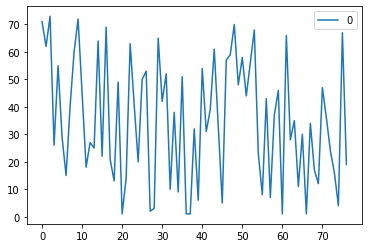

In [ ]:

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
names=pd.DataFrame(X2.columns)
lin_reg = LinearRegression()
rfe_mod = RFE(lin_reg, 5, step=1) #RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(X2,y) #to fit
myvalues.support_    #The mask of selected features.
myvalues.ranking_     #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings.plot()

In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, Y_train)
print("BEST PARAMS", logreg_cv.best_params_)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


BEST PARAMS {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7892857142857143


In [ ]:
lr = LogisticRegression(C=1, penalty='l2', solver='lbfgs')
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

accuracy_score(y_pred, Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9444444444444444

## 5. Calculate the accuracy on the test data using the method score:

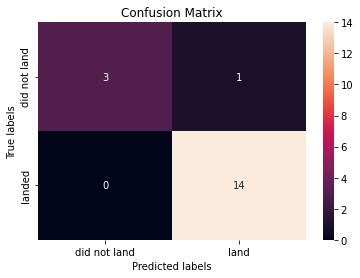

In [ ]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## 6. Support Vector Machine with GridSearch
Create a SVM object using then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
svm_cv = GridSearchCV(svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train, Y_train)
print("BEST PARAMS", svm_cv.best_params_)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

In [ ]:
svm_cv = SVC(kernel='linear', C=3, gamma=3)
svm_cv.fit(X_train, Y_train)

SVC(C=3, gamma=3, kernel='linear')

# 7. Calculate the accuracy on the test data using the method score:

In [ ]:
yhat=svm_cv.predict(X_test)
accuracy_score(Y_test, yhat)

0.8333333333333334

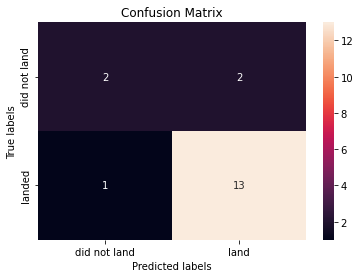

In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
svm_cv = SVC(kernel='rbf', C=1, gamma=3)
svm_cv.fit(X_train, Y_train)

SVC(C=1, gamma=3)

In [ ]:
yhat=svm_cv.predict(X_test)
accuracy_score(Y_test, yhat)

0.7777777777777778

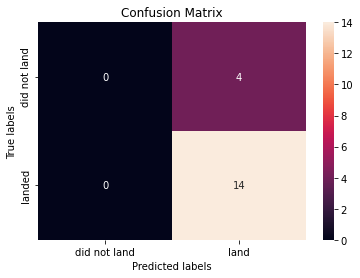

In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## 8. Decision Tree with GridSearch
Create a decision tree object using then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
tree_cv = GridSearchCV(tree, param_grid=parameters, cv=10)
tree_cv.fit(X_train, Y_train)
print("BEST PARAMS", tree_cv.best_params_)


BEST PARAMS {'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}


In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8767857142857143


## 9. Calculate the accuracy of tree_cv on the test data using the method score:

In [ ]:
yhat=tree_cv.predict(X_test)
accuracy_score(Y_test, yhat)

0.7222222222222222

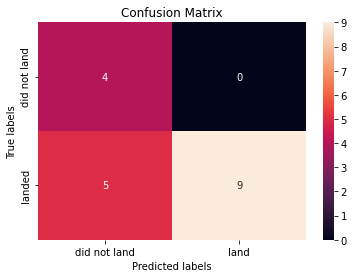

In [ ]:
yhat=tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## 10. K-nearest neighbors object  with GridSearch
Create a KNN object using then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN = KNeighborsClassifier()

In [ ]:
KNN_cv = GridSearchCV(KNN, param_grid=parameters, cv=10)
KNN_cv.fit(X_train, Y_train)
print("BEST PARAMS", KNN_cv.best_params_)

BEST PARAMS {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}


In [ ]:
print("tuned hpyerparameters :(best parameters) ",KNN_cv.best_params_)
print("accuracy :",KNN_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.6785714285714286


## 11. Calculate the accuracy of tree_cv on the test data using the method score:

In [ ]:
yhat=KNN_cv.predict(X_test)
accuracy_score(Y_test, yhat)

0.5

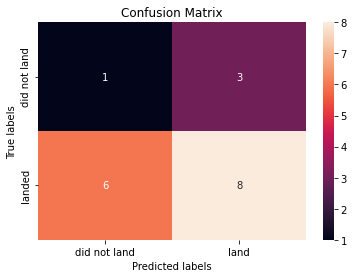

In [ ]:
yhat=KNN_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## 12. The Best Method

Based on all the evaluations above on the test set, the best method is the logistic regression, with a prediction accuracy of 0.94.


In [21]:
p = [['Logistic',0.944], ['SVM', .833],['Tree', .778],['KNN', .722]]
p = pd.DataFrame(p)
p.columns =['Classifier', 'Score']
p

,Classifier,Score
0,Logistic,0.944
1,SVM,0.833
2,Tree,0.778
3,KNN,0.722


<AxesSubplot:xlabel='Classifier'>

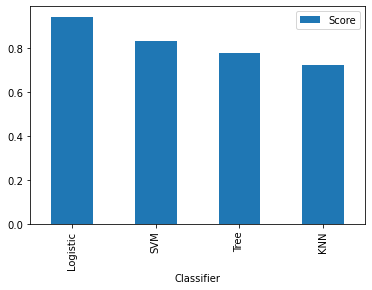

In [23]:
p.plot.bar(y='Score', x='Classifier')

## Acknowledgement:
This notebook is based on the template prepared by Joseph Santarcangelo of the IBM Corporation for the Applied Data Analysis Capstone Project.